<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [64]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


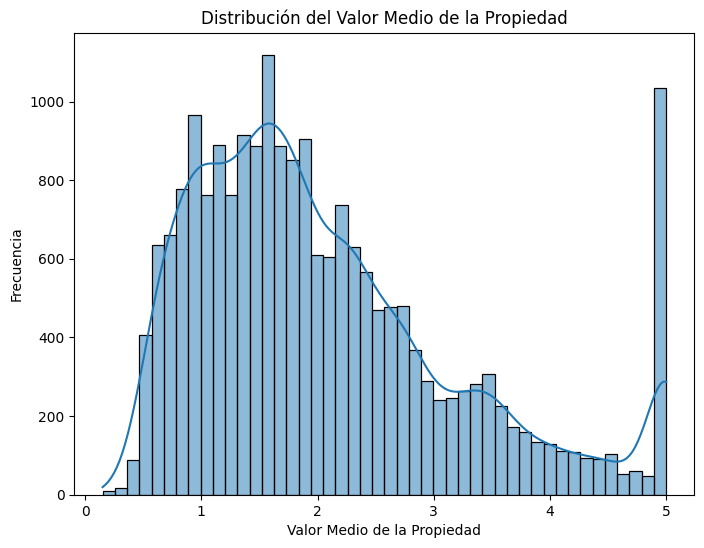

In [65]:
# 1. Definición del problema: Clarificar el objetivo del análisis y los resultados esperados.
# El objetivo es predecir el valor medio de las propiedades (medianhousevalue) utilizando las otras características.

# 2. Estadística descriptiva: Resumir las principales características de los datos a través de medidas estadísticas.

# Mostrar información general del DataFrame
print(housing.info())

# Mostrar estadísticas descriptivas de las columnas numéricas
display(housing.describe())

# Mostrar la distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.histplot(housing['target'], kde=True)
plt.title('Distribución del Valor Medio de la Propiedad')
plt.xlabel('Valor Medio de la Propiedad')
plt.ylabel('Frecuencia')
plt.show()


**Análisis de Estadística Descriptiva:**

*   El conjunto de datos contiene 20640 registros y 9 columnas numéricas. No hay valores faltantes en ninguna columna, lo que simplifica la etapa de limpieza.
*   La media del valor medio de la propiedad (`target`) es aproximadamente 2.07, con una desviación estándar de 1.15. Los valores van desde 0.15 hasta 5.00.
*   Observando las estadísticas de las otras columnas, podemos ver rangos y distribuciones variadas para cada característica. Por ejemplo, la edad media de las viviendas (`HouseAge`) varía entre 1 y 52 años, y la población (`Population`) tiene un rango amplio.

### 3. Visualización descriptiva
Utilizaremos gráficos para explorar los datos y sus relaciones.

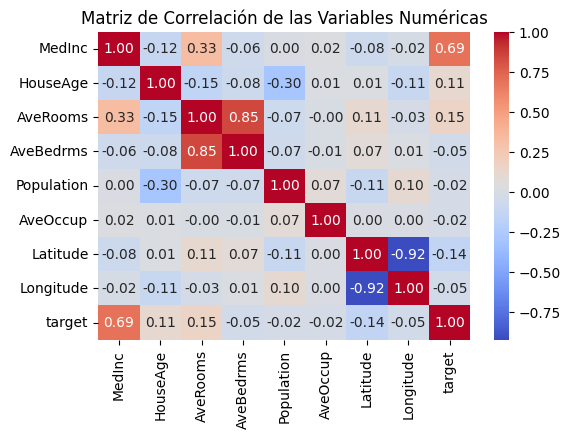

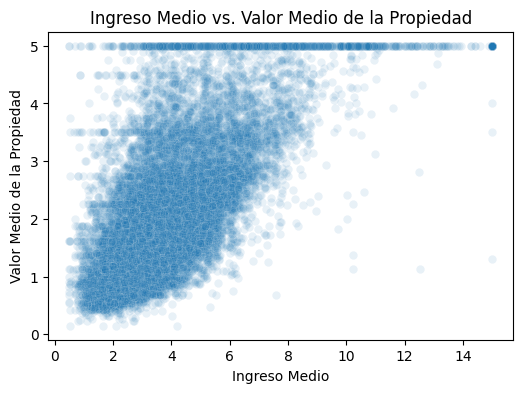

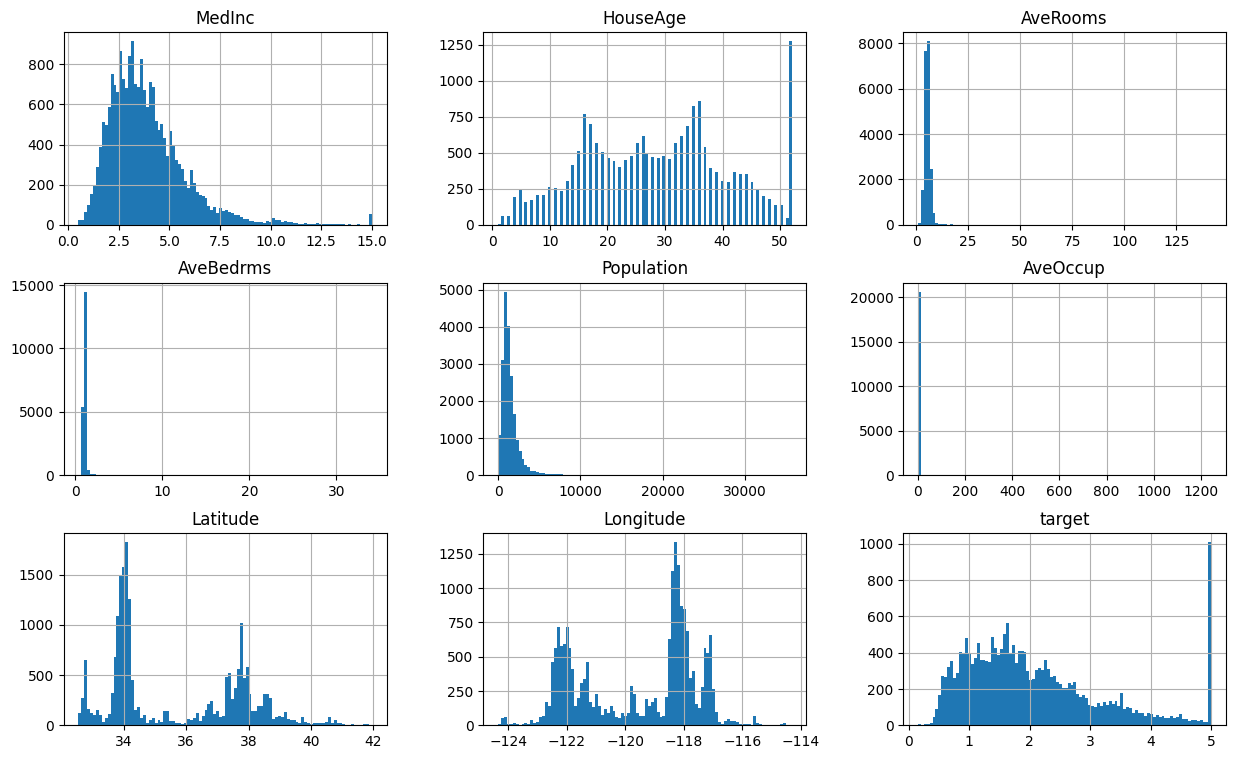

In [66]:
# Visualizar la correlación entre las variables numéricas
plt.figure(figsize=(6, 4))
sns.heatmap(housing.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()

# Visualizar la relación entre el ingreso medio y el valor medio de la propiedad
plt.figure(figsize=(6, 4))
sns.scatterplot(x='MedInc', y='target', data=housing, alpha=0.1)
plt.title('Ingreso Medio vs. Valor Medio de la Propiedad')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de la Propiedad')
plt.show()

# Visualizar histogramas para todas las columnas numéricas
housing.iloc[:, :].hist(bins = 100, figsize= (15,9))
plt.show()

**Análisis de Visualización Descriptiva:**

*   **Matriz de Correlación:** La matriz de correlación muestra la relación lineal entre las variables. Se observa una correlación positiva moderada entre `MedInc` (ingreso medio) y `target` (valor medio de la propiedad), lo que sugiere que a mayor ingreso medio, mayor tiende a ser el valor de la propiedad. Otras correlaciones notables incluyen `AveRooms` y `AveBedrms`, `Population` y `Households`, y `Latitude` y `Longitude`.
*   **Ingreso Medio vs. Valor Medio de la Propiedad:** El gráfico de dispersión entre `MedInc` y `target` confirma la relación positiva. Se puede observar una concentración de puntos en la parte inferior izquierda y una dispersión mayor a medida que aumenta el ingreso medio. También hay una banda horizontal de puntos en la parte superior, lo que podría indicar un límite en el valor de las propiedades reportado en los datos.
*   **Histogramas:** Los histogramas nos permiten visualizar la distribución de cada variable. Algunas variables, como `MedInc` y `AveRooms`, parecen tener distribuciones sesgadas. `HouseAge` y `target` muestran una acumulación de valores en el extremo superior. Estas distribuciones pueden ser importantes a considerar durante el preprocesamiento y la selección del modelo.

### 4. Preprocesamiento
Realizaremos los pasos necesarios de limpieza y transformación de los datos.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy

# Identificar y manejar valores faltantes
print("Valores faltantes por columna:")
print(housing.isnull().sum())

# En este dataset no hay valores nulos, si los hubiera, se podrían imputar o eliminar filas.

# Codificar la variable categórica 'ocean_proximity'
# housing = pd.get_dummies(housing, columns=['ocean_proximity'], drop_first=True) # Removed

# Crear una copia para la limpieza de outliers
housing_clean = housing.copy()

# Eliminar outliers utilizando el método IQR para cada columna numérica
print("\nDimensiones antes de eliminar outliers:", housing_clean.shape)
for col in housing_clean.select_dtypes(include=np.number).columns: # Apply to numerical columns
    Q1 = np.percentile(housing_clean[col], 25)
    Q3 = np.percentile(housing_clean[col], 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    housing_clean = housing_clean[(housing_clean[col] >= lower) & (housing_clean[col] <= upper)]

print("Dimensiones después de eliminar outliers:", housing_clean.shape)

# Separar características (X) y variable objetivo (y) de los datos limpios
X_clean = housing_clean.drop('target', axis=1)
y_clean = housing_clean['target']


# Dividir los datos limpios en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDimensiones de los conjuntos de datos después del escalado:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Update X_train and X_test to the scaled versions for subsequent steps
X_train = X_train_scaled
X_test = X_test_scaled

Valores faltantes por columna:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Dimensiones antes de eliminar outliers: (20640, 9)
Dimensiones después de eliminar outliers: (16232, 9)

Dimensiones de los conjuntos de datos después del escalado:
X_train_scaled: (12985, 8)
X_test_scaled: (3247, 8)
y_train: (12985,)
y_test: (3247,)


### 5. Selección de modelo
Compararemos al menos cuatro modelos de predicción diferentes.

In [68]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Lista de modelos a evaluar
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Bayesian Ridge Regression": BayesianRidge()
}

results = {}

# Entrenar y evaluar cada modelo usando cross-validation
for name, model in models.items():
    print(f"Entrenando y evaluando {name}...")
    # Usamos neg_mean_squared_error y luego tomamos la raíz cuadrada y el valor absoluto para obtener el RMSE (un valor más bajo es mejor)
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    results[name] = rmse_scores.mean()
    print(f"{name} - Promedio RMSE (Cross-Validation): {results[name]:.4f}\n")

# Mostrar los resultados promedio de RMSE
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Average RMSE (Cross-Validation)'])
results_df = results_df.sort_values(by='Average RMSE (Cross-Validation)')

print("Resultados promedio de RMSE (Cross-Validation):")
display(results_df)

Entrenando y evaluando Linear Regression...
Linear Regression - Promedio RMSE (Cross-Validation): 0.5589

Entrenando y evaluando Decision Tree Regressor...
Decision Tree Regressor - Promedio RMSE (Cross-Validation): 0.6384

Entrenando y evaluando K-Neighbors Regressor...
K-Neighbors Regressor - Promedio RMSE (Cross-Validation): 0.5545

Entrenando y evaluando Bayesian Ridge Regression...
Bayesian Ridge Regression - Promedio RMSE (Cross-Validation): 0.5589

Resultados promedio de RMSE (Cross-Validation):


,Model,Average RMSE (Cross-Validation)
2,K-Neighbors Regressor,0.554459
0,Linear Regression,0.558908
3,Bayesian Ridge Regression,0.558909
1,Decision Tree Regressor,0.638386


### 6. Métricas y análisis de resultados
Evaluaremos el rendimiento del mejor modelo utilizando métricas apropiadas.

In [69]:
# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='RMSE')

print("Comparación de Métricas en el Conjunto de Prueba:")
display(metrics_df)

Comparación de Métricas en el Conjunto de Prueba:


,Model,MAE,MSE,RMSE,MAPE
1,Decision Tree Regressor,0.4547,0.4952,0.7037,24.9141
3,Bayesian Ridge Regression,0.5332,0.5556,0.7454,31.9528
0,Linear Regression,0.5332,0.5559,0.7456,31.9522
2,K-Neighbors Regressor,0.8128,1.1187,1.0577,53.4489


**Análisis de Métricas en el Conjunto de Prueba:**

La tabla anterior muestra las métricas de rendimiento para cada uno de los modelos evaluados en el conjunto de prueba.

*   **RMSE (Root Mean Squared Error):** Esta métrica es crucial en problemas de regresión, ya que representa la desviación estándar de los errores de predicción. Un valor de RMSE más bajo indica que las predicciones del modelo están más cerca de los valores reales. En este caso, el **Decision Tree Regressor** obtuvo el RMSE más bajo (0.7037), lo que sugiere que es el modelo con mejor rendimiento en términos de precisión general de las predicciones. Le siguen de cerca **Bayesian Ridge Regression** (0.7454) y **Linear Regression** (0.7456), con rendimientos muy similares. El **K-Neighbors Regressor** tuvo el RMSE más alto (1.0577), indicando un rendimiento inferior en comparación con los otros modelos para este conjunto de datos.

*   **MAE (Mean Absolute Error):** El MAE mide la magnitud promedio de los errores de predicción sin considerar su dirección. Similar al RMSE, un MAE más bajo indica un mejor rendimiento. El **Decision Tree Regressor** también presenta el MAE más bajo (0.4547), lo que corrobora su buen desempeño.

*   **MSE (Mean Squared Error):** El MSE es el promedio de los errores al cuadrado. Penaliza más los errores grandes que el MAE. El **Decision Tree Regressor** tiene el MSE más bajo (0.4952).

*   **MAPE (Mean Absolute Percentage Error):** El MAPE expresa el error promedio como un porcentaje de los valores reales. Puede ser sensible a valores reales cercanos a cero. En este caso, el **Decision Tree Regressor** tiene el MAPE más bajo (24.9141%), lo que indica que, en promedio, sus predicciones se desvían en aproximadamente un 25% de los valores reales.

**Conclusión del Análisis de Métricas:**

Basándonos en las métricas de rendimiento en el conjunto de prueba, el **Decision Tree Regressor** parece ser el modelo más adecuado para predecir el valor medio de las propiedades en este conjunto de datos, ya que consistentemente obtuvo los valores más bajos en RMSE, MAE y MSE. Los modelos de Regresión Lineal y Bayesian Ridge Regression tuvieron un rendimiento similar entre sí, pero ligeramente inferior al del Árbol de Decisión. El modelo K-Neighbors Regressor mostró el rendimiento más bajo entre los evaluados.

### 7. Visualización de resultados del modelo
Crearemos gráficos que muestren el desempeño del modelo.

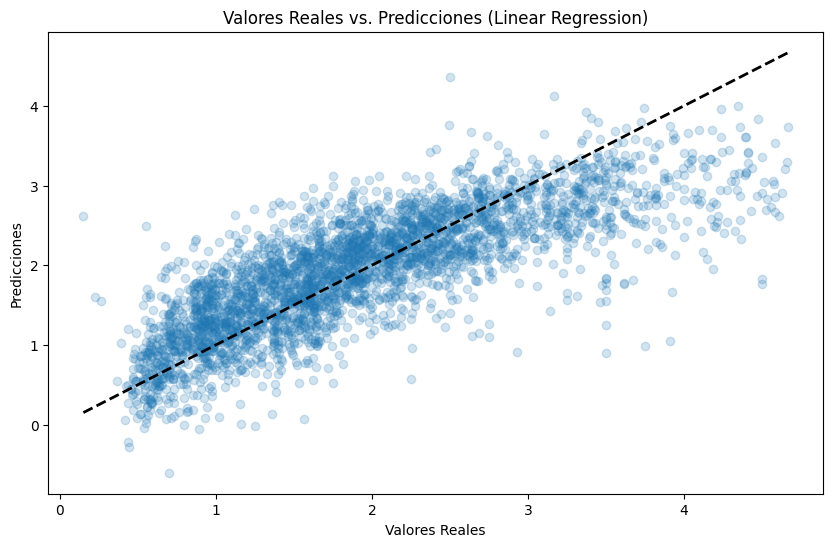

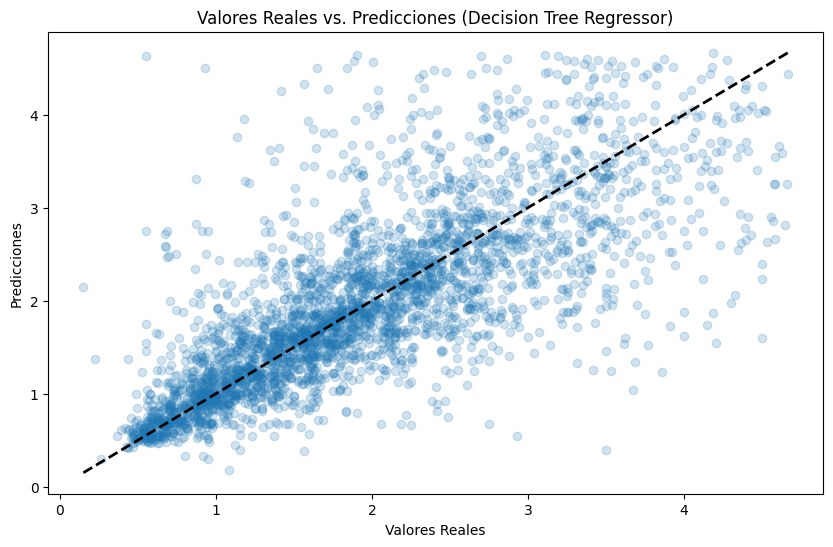

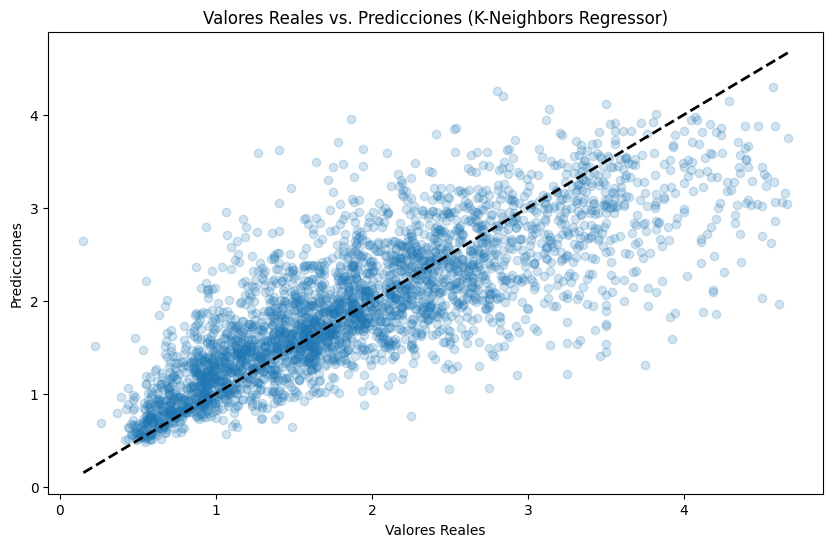

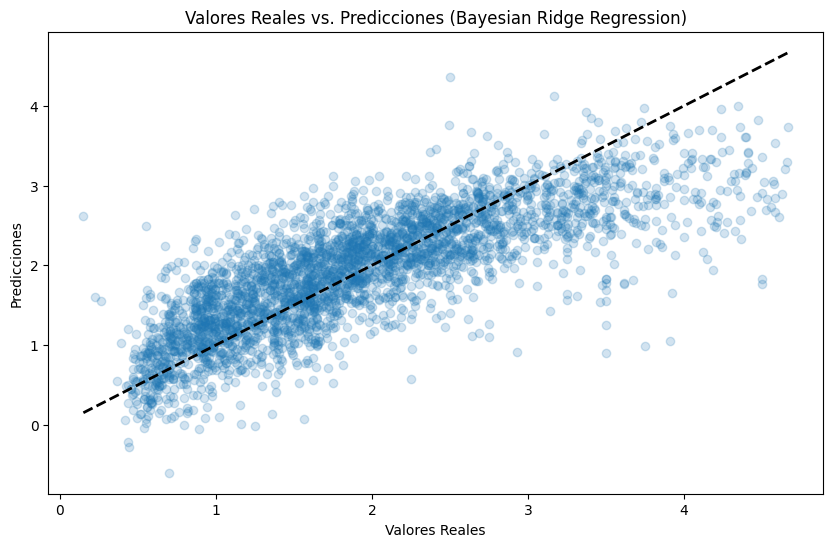

In [70]:
# Visualizar las predicciones vs los valores reales para cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.2)
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.title(f"Valores Reales vs. Predicciones ({name})")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de referencia perfecta
    plt.show()

### 8. Conclusiones de la Regresión

En esta sección del laboratorio, nos enfocamos en predecir el valor medio de las propiedades utilizando un conjunto de datos de viviendas en California. Seguimos una serie de pasos, desde la exploración inicial hasta la evaluación de modelos de *Machine Learning*.

**Hallazgos Clave:**

*   **Exploración de Datos:** Realizamos un análisis descriptivo y visualizaciones para comprender la distribución de las variables y sus relaciones. Identificamos, por ejemplo, una correlación positiva entre el ingreso medio (`MedInc`) y el valor medio de la propiedad (`target`). Los histogramas revelaron las distribuciones de cada característica, destacando algunas asimetrías y concentraciones de valores.
*   **Preprocesamiento:** Abordamos la preparación de los datos eliminando *outliers* utilizando el método del rango intercuartílico (IQR) y estandarizando las características numéricas. Este paso fue crucial para mejorar el rendimiento de algunos modelos sensibles a la escala de los datos.
*   **Selección y Evaluación de Modelos:** Comparamos cuatro modelos de regresión: Regresión Lineal, Bayesian Ridge Regression, Decision Tree Regressor y K-Neighbors Regressor. Utilizamos validación cruzada para una evaluación inicial y luego calculamos métricas de rendimiento (MAE, MSE, RMSE, MAPE) en el conjunto de prueba con los datos preprocesados.
*   **Rendimiento del Modelo:** Basado en las métricas en el conjunto de prueba, el **Decision Tree Regressor** consistentemente mostró el mejor rendimiento, obteniendo el menor RMSE, MAE y MSE. Los modelos de Regresión Lineal y Bayesian Ridge tuvieron un rendimiento similar entre sí, mientras que K-Neighbors Regressor mostró un rendimiento inferior en comparación.

**Conclusión General:**

El análisis de regresión nos permitió identificar que el **Decision Tree Regressor** fue el modelo más efectivo para predecir el valor medio de las propiedades en este dataset, después de aplicar técnicas de preprocesamiento como la eliminación de *outliers* y la estandarización. La relación entre el ingreso medio y el valor de la propiedad fue un hallazgo importante durante la exploración de datos, lo cual fue bien capturado por los modelos.

Este análisis proporciona una base sólida para la predicción del valor de las propiedades y destaca la importancia de la exploración de datos y el preprocesamiento en el *Machine Learning*.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [71]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [72]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [73]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [74]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [75]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [76]:
#Distribucion de los datos
print("Distribución de los datos:")
display(digits['target'].value_counts().sort_index())

# ¿Cuánta memoria estoy utilizando?
print("\nUso de memoria del DataFrame 'digits':")
print(digits.info(memory_usage='deep'))


# ¿Qué tipo de datos son?
print("\nTipos de datos por columna:")
print(digits.dtypes)


# ¿Cuántos registros por clase hay?
# Esta pregunta ya fue respondida al inicio del análisis exploratorio.
print("\nDistribución de registros por clase (dígito):")
print(digits['target'].value_counts().sort_index())


# ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?
# Basándonos en la descripción, los datos son imágenes 8x8 de dígitos del 0 al 9 con valores de píxel entre 0 y 16.
# Verificamos el rango de valores de píxel y los valores únicos en la columna 'target' anteriormente.
print("\nRango de valores de píxel:")
print(f"Mínimo valor de píxel: {digits.drop(columns='target').values.min()}")
print(f"Máximo valor de píxel: {digits.drop(columns='target').values.max()}")

print("\nValores únicos en la columna 'target':")
print(digits['target'].unique())

# La distribución de clases parece razonablemente equilibrada, y los valores de píxel y target están dentro
# de los rangos esperados. No parece haber registros que no se correspondan con el conocimiento previo.

Distribución de los datos:


,count
target,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174



Uso de memoria del DataFrame 'digits':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     

No hay valores que se encuentren fuera de lo esperado

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [77]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

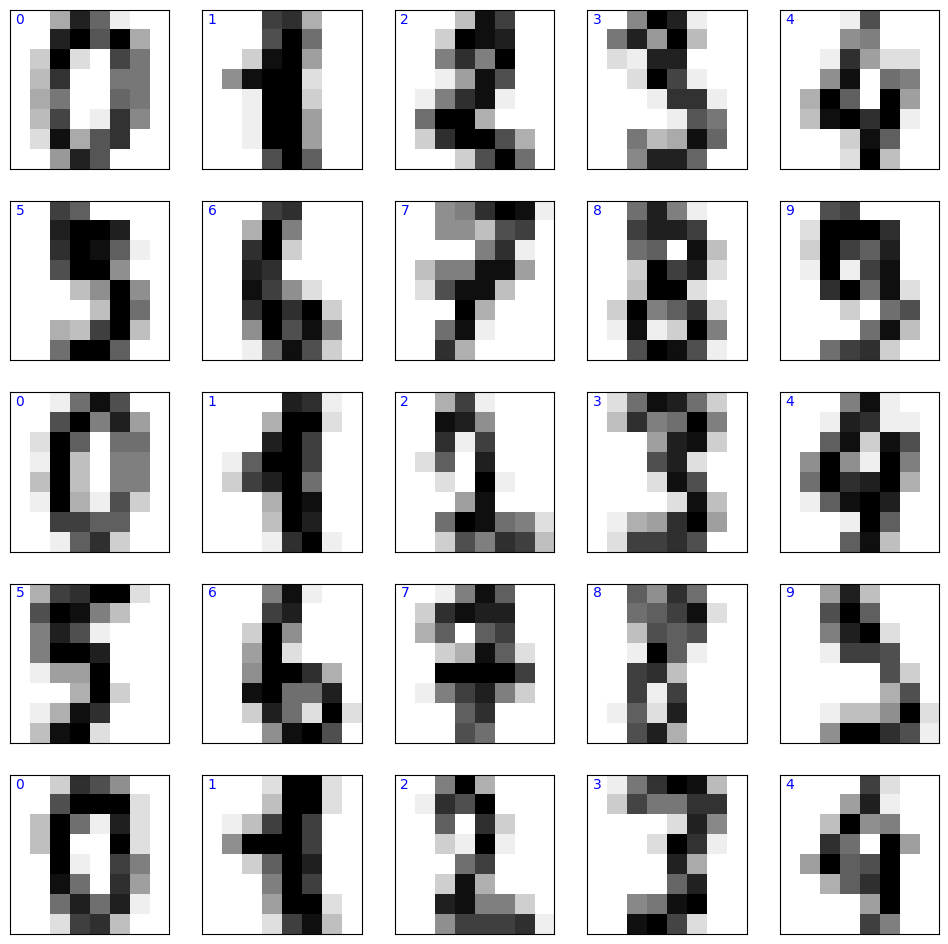

In [78]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
# Visualizar las primeras 25 imágenes
for i in range(nx * ny):
    row = i // ny
    col = i % ny
    ax = axs[row, col]
    ax.imshow(digits_dict["images"][i], cmap='gray_r')
    ax.text(0, 0, str(digits_dict["target"][i]), color='blue', fontsize=10, ha='center', va='center')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [79]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

In [80]:
# Ejercicio 3: Machine Learning - Clasificación

# Separar características (X) y variable objetivo (y)
X = digits.drop(columns="target").values
y = digits["target"].values

In [81]:
# Crear conjunto de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Usaremos 25% para testeo

# Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo
print(f"Largo del conjunto de entrenamiento: {len(X_train)}")
print(f"Largo del conjunto de testeo: {len(X_test)}")

Largo del conjunto de entrenamiento: 1347
Largo del conjunto de testeo: 450


Entrenando Logistic Regression...
Métricas para Logistic Regression:
  Accuracy: 0.9733
  Precision: 0.9738
  Recall: 0.9737
  F1-score: 0.9737



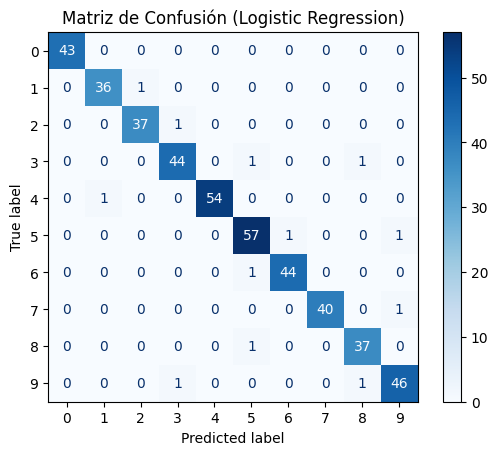

Entrenando K-Neighbors Classifier...
Métricas para K-Neighbors Classifier:
  Accuracy: 0.9933
  Precision: 0.9944
  Recall: 0.9941
  F1-score: 0.9942



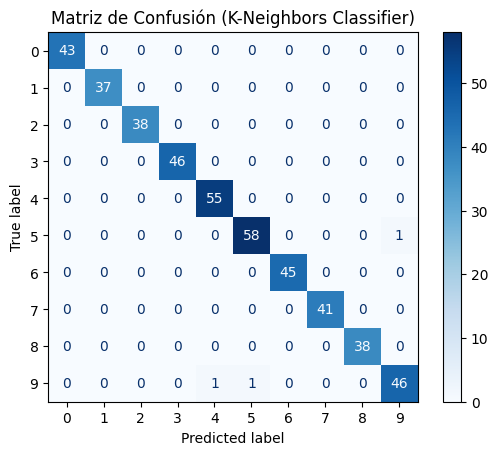

Entrenando Support Vector Classifier...
Métricas para Support Vector Classifier:
  Accuracy: 0.9867
  Precision: 0.9869
  Recall: 0.9869
  F1-score: 0.9869



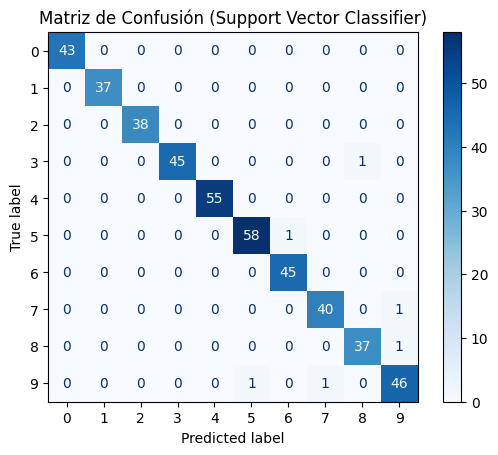

Resumen de Métricas de Clasificación en el Conjunto de Prueba:


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.973333,0.973801,0.973650,0.973679
K-Neighbors Classifier,0.993333,0.994392,0.994138,0.994246
Support Vector Classifier,0.986667,0.986894,0.986894,0.986870


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Lista de modelos a evaluar
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=10000), # Aumentar max_iter para convergencia
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC() # Un algoritmo adicional de libre elección
}

results_classification = {}

# Entrenar, predecir y evaluar cada modelo
for name, model in classification_models.items():
    print(f"Entrenando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro') # Usar macro para multiclase
    recall = recall_score(y_test, y_pred, average='macro') # Usar macro para multiclase
    f1 = f1_score(y_test, y_pred, average='macro') # Usar macro para multiclase

    results_classification[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

    print(f"Métricas para {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}\n")

    # Graficar matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_dict['target_names'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión ({name})')
    plt.show()


# Mostrar resumen de métricas
results_df_classification = pd.DataFrame(results_classification).T
print("Resumen de Métricas de Clasificación en el Conjunto de Prueba:")
display(results_df_classification)

El modelo K-Neighbors Classifier obtuvo los mejores resultados en Accuracy, Precision, Recall y F1-score en el conjunto de prueba.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

Generando Curva ROC para K-Neighbors Classifier...


/tmp/ipython-input-1149709689.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Use colormaps for better practice


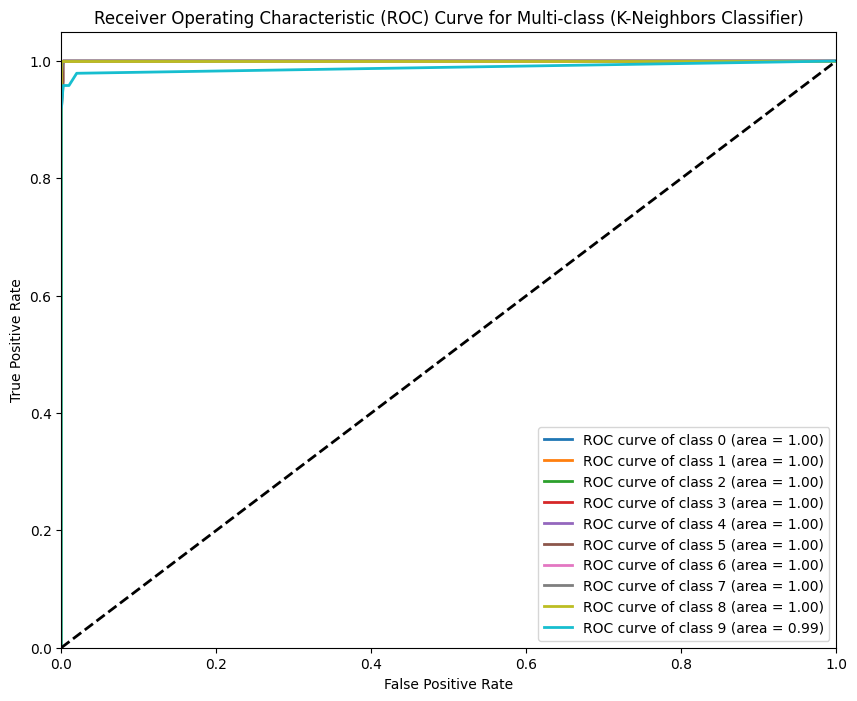

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar el mejor modelo (K-Neighbors Classifier)
best_model_classification = KNeighborsClassifier()
name = "K-Neighbors Classifier"

print(f"Generando Curva ROC para {name}...")
best_model_classification.fit(X_train, y_train)

# Para la curva ROC en clasificación multiclase, necesitamos las probabilidades de predicción
y_score = best_model_classification.predict_proba(X_test)

# Binarizar las etiquetas reales para calcular la curva ROC por clase
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Trazar la curva ROC para cada clase
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes) # Use colormaps for better practice
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for Multi-class ({name})')
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [84]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

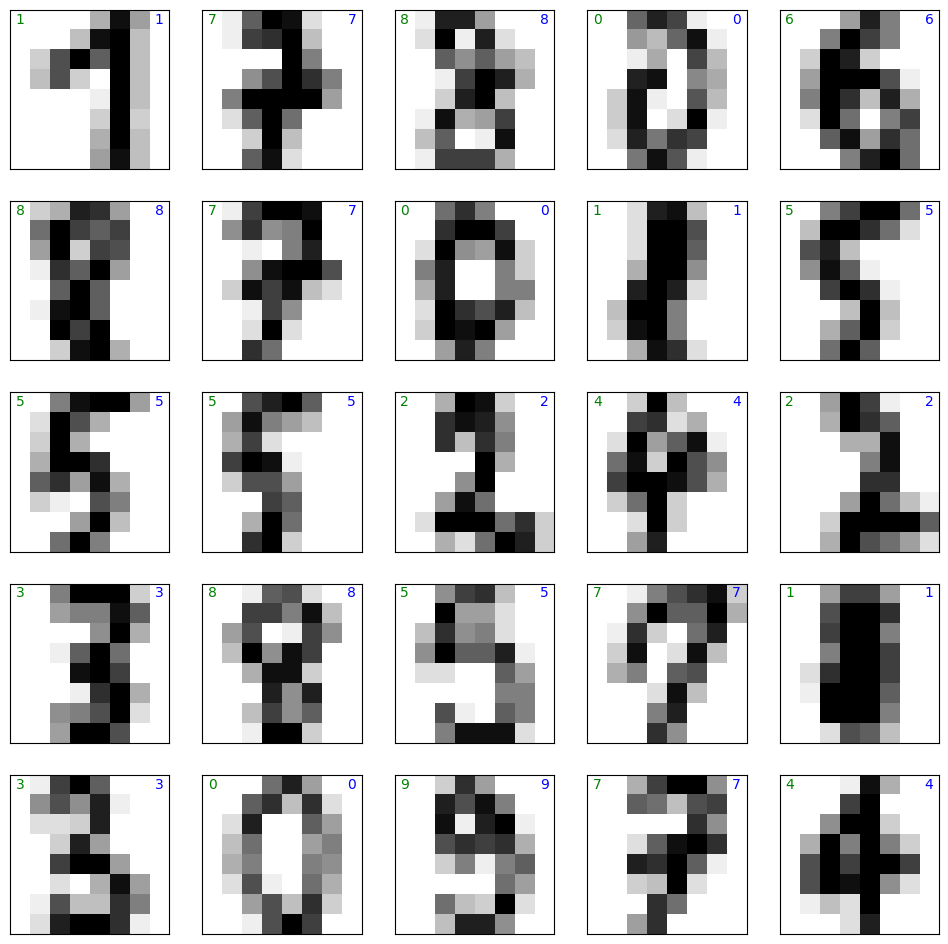

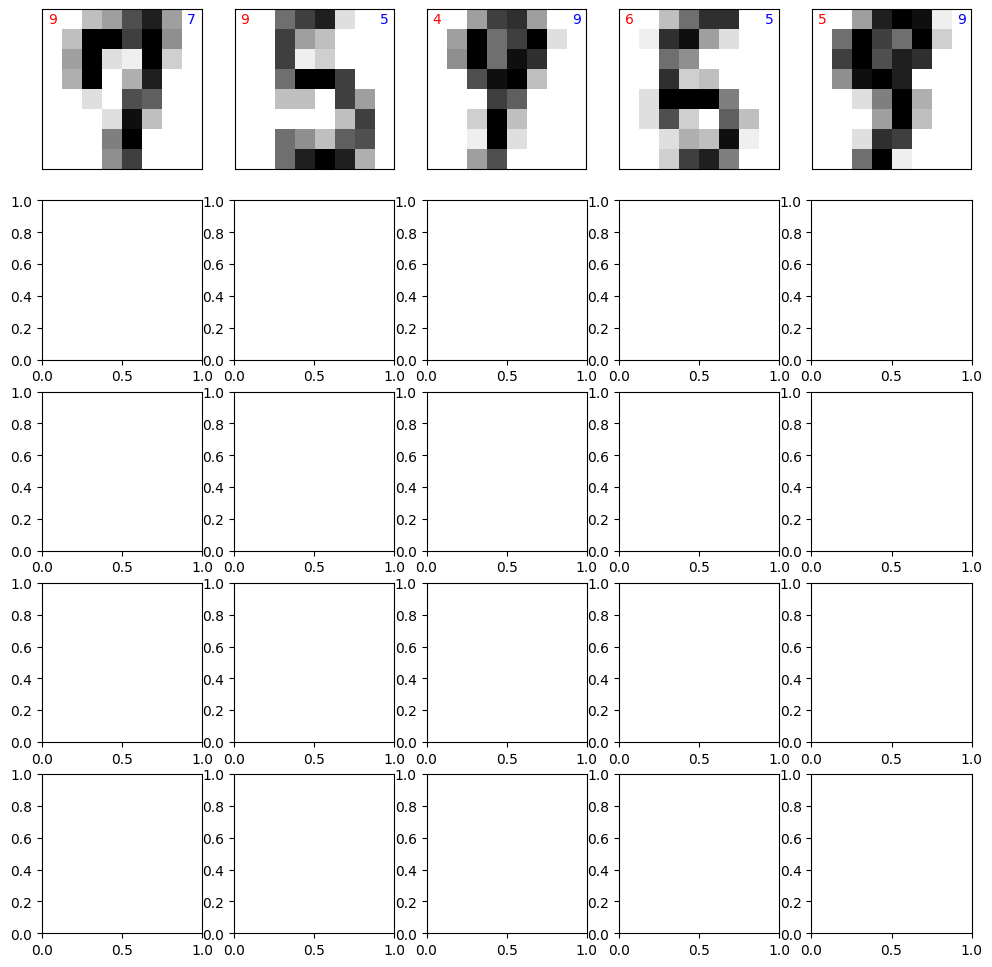

In [85]:
# Graficar cuando el valor predicho y original son iguales
mostrar_resultados(digits, model=best_model_classification, nx=5, ny=5, label="correctos")
# Cuando son distintos
mostrar_resultados(digits, model=best_model_classification, nx=5, ny=5, label="incorrectos")

Los fallos en la clasificación pueden deberse a varios factores, especialmente con un modelo como K-Neighbors Classifier y datos de dígitos escritos a mano:

*   **Similitud entre Dígitos:** Algunos dígitos escritos a mano son muy parecidos entre sí (por ejemplo, un 3 y un 5, o un 7 y un 9), lo que puede llevar a confusiones.
*   **Sensibilidad de KNN a la Distancia:** KNN se basa en la distancia (como la distancia Euclidiana entre píxeles) para encontrar vecinos cercanos. Si la escritura es inusual o varía significativamente de los ejemplos de entrenamiento, la distancia calculada puede no reflejar correctamente la similitud real del dígito, llevando a errores.
*   **Variabilidad en la Escritura:** Cada persona escribe los dígitos de manera distinta, creando variaciones en los patrones que el modelo puede no haber visto suficientemente durante el entrenamiento.
*   **Baja Resolución:** Las imágenes tienen una resolución baja (8x8 píxeles), lo que limita la cantidad de detalle disponible para el modelo, haciendo que la distinción entre dígitos similares sea más difícil.

Estas fallas ocurren en instancias donde la variabilidad de la escritura, la baja resolución o la ambigüedad visual hacen que un dígito se parezca más a ejemplos de una clase diferente en el espacio de características que a su propia clase.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En esta parte del laboratorio, nos metimos a clasificar imágenes de dígitos escritos a mano usando Machine Learning.

**En resumen, esto fue lo que hicimos y encontramos:**

*   **Vimos los Datos:** Exploramos cómo se veían los datos de los dígitos y cuántos de cada uno teníamos. Resultó que estaban bastante parejos.
*   **Preparamos y Probamos Modelos:** Entrenamos y pusimos a prueba tres modelos para clasificar los dígitos: Regresión Logística, K-Neighbors Classifier y Support Vector Classifier. Miramos qué tan bien lo hacían usando métricas como Accuracy, Precision, Recall y F1-score, además de ver las matrices de confusión.
*   **El Mejor Modelo:** De los que probamos, el **K-Neighbors Classifier** fue el que mejor le fue. Sus métricas fueron las más altas, y el gráfico de curva ROC también mostró que es muy bueno distinguiendo los diferentes dígitos.
*   **¿Por qué a veces falla?** Nos dimos cuenta de que los errores pasan a menudo porque la forma en que la gente escribe los números varía mucho. A veces, un dígito se parece mucho a otro, o la imagen tiene baja calidad (solo 8x8 píxeles), lo que confunde al modelo KNN porque se basa en qué tan cerca están los puntos.

**En pocas palabras:**

El **K-Neighbors Classifier** resultó ser súper bueno para reconocer estos dígitos escritos a mano después de todo el análisis. Aunque a veces se equivoca por cómo están escritos los números o por la calidad de la imagen, en general funciona bastante bien.

Esto nos enseña que es clave mirar bien los datos y elegir un modelo que le vaya bien con ellos para que las predicciones salgan lo mejor posible.